at_risk
0    0.715
1    0.285
Name: proportion, dtype: float64
🔍 Classification Report:
              precision    recall  f1-score   support

 Not At Risk       1.00      0.99      1.00       143
     At Risk       0.98      1.00      0.99        57

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



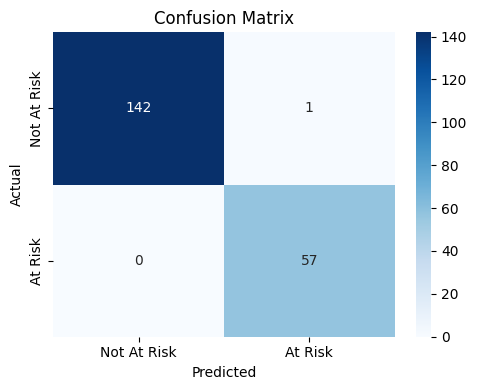

✅ Model saved to models/at_risk_model.pkl


In [3]:
# 📘 At-Risk Student Classification
# Goal: Predict if a student is at risk (average_score < 60)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../data/cleaned/students_cleaned.csv")

# -------------------------------------
# 🎯 Step 1: Create 'at_risk' target
# -------------------------------------
df['at_risk'] = df['average_score'].apply(lambda x: 1 if x < 60 else 0)

# Check class balance
print(df['at_risk'].value_counts(normalize=True))

# -------------------------------------
# 🧹 Step 2: Preprocess
# -------------------------------------
X = df.drop(columns=["average_score", "performance", "at_risk"])
X = pd.get_dummies(X, drop_first=True)
y = df["at_risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# -------------------------------------
# ⚙️ Step 3: Train Classifier (Logistic Regression)
# -------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -------------------------------------
# 📊 Step 4: Evaluation
# -------------------------------------
y_pred = model.predict(X_test)

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not At Risk", "At Risk"]))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not At Risk", "At Risk"], yticklabels=["Not At Risk", "At Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------------------------
# 💾 Step 5: Save Model
# -------------------------------------
joblib.dump(model, "../models/at_risk_model.pkl")
print("✅ Model saved to models/at_risk_model.pkl")
